# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2020

Мягкий дедлайн: 01:59MSK 19.10.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 01:59MSK 22.10.2020

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: хочу 12, все есть)

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по одному объекту, выбранному случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Евклидова норма разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь для каждой итерации, начиная с нулевой (до первого шага).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
)
from utils import LinearRegression

In [3]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [4]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [5]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [6]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [7]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [8]:
# LinearRegression

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)

regression.fit(X, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

prediction = regression.predict(X)

assert prediction.shape[0] == num_objects, 'Predict failed'

Если ваше решение прошло все тесты локально, то теперь осталось протестировать его в Яндекс Контесте - **https://contest.yandex.ru/contest/19551**.

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

**nickname** limon8884
* **GradientDescent**: https://contest.yandex.ru/contest/19551/run-report/36794565/
* **StochasticDescent**: https://contest.yandex.ru/contest/19551/run-report/36501861/
* **MomentumDescent**: https://contest.yandex.ru/contest/19551/run-report/36501984/
* **Adagrad**: https://contest.yandex.ru/contest/19551/run-report/36502206/
* **LinearRegression**: https://contest.yandex.ru/contest/19551/run-report/36825344/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.
Для дальнейшей работы сделайте следующее:
* Проведите разумную предобработку данных.
* Замените целевую переменную на её логарифм.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1.

In [118]:
# YOUR CODE:
import pandas as pd
df_pre = pd.read_csv('autos.csv')
df_pre

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,2001,6,2016-03-17 00:00:00,2016-03-17 17:40:17,91074,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,2008,7,2016-03-31 00:00:00,2016-04-06 10:17:21,60437,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,1995,10,2016-04-04 00:00:00,2016-04-06 19:17:07,33775,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,2004,8,2016-04-01 00:00:00,2016-04-05 18:18:39,67112,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,2004,12,2016-03-26 00:00:00,2016-04-06 10:45:34,96224,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247867,bmw,3er,kombi,manuell,diesel,nein,3,150000,2005,5,2016-04-02 00:00:00,2016-04-06 20:47:12,81825,3999
247868,seat,leon,limousine,manuell,benzin,ja,225,150000,2004,5,2016-03-19 00:00:00,2016-03-19 20:44:43,96465,3200
247869,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,2000,3,2016-03-05 00:00:00,2016-03-11 18:17:12,26135,1199
247870,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,1996,3,2016-03-19 00:00:00,2016-04-07 07:15:26,87439,9200


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
print(df_pre.isna().sum().sum()) #пропусков нет
print(sum((pd.to_datetime(df_pre['dateCreated']).dt.year == datetime.date(2016, 1, 1).year).astype(int))) 
# без 30 объектов вся выборка
df_pre = df_pre[pd.to_datetime(df_pre['dateCreated']).dt.year == datetime.date(2016, 1, 1).year]
df_pre['dayCreate'] = pd.to_datetime(df_pre['dateCreated']).dt.dayofyear
df_pre['daySeen'] = pd.to_datetime(df_pre['lastSeen']).dt.dayofyear
df_pre['weekdayCreate'] = pd.to_datetime(df_pre['dateCreated']).dt.weekday
df_pre['weekdaySeen'] = pd.to_datetime(df_pre['lastSeen']).dt.weekday
df_pre

0
247848


c:\users\danill\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\danill\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
c:\users\danill\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price,dayCreate,daySeen,weekdayCreate,weekdaySeen
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,2001,6,2016-03-17 00:00:00,2016-03-17 17:40:17,91074,1500,77,77,3,3
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,2008,7,2016-03-31 00:00:00,2016-04-06 10:17:21,60437,3600,91,97,3,2
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,1995,10,2016-04-04 00:00:00,2016-04-06 19:17:07,33775,650,95,97,0,2
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,2004,8,2016-04-01 00:00:00,2016-04-05 18:18:39,67112,2200,92,96,4,1
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,2004,12,2016-03-26 00:00:00,2016-04-06 10:45:34,96224,2000,86,97,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247867,bmw,3er,kombi,manuell,diesel,nein,3,150000,2005,5,2016-04-02 00:00:00,2016-04-06 20:47:12,81825,3999,93,97,5,2
247868,seat,leon,limousine,manuell,benzin,ja,225,150000,2004,5,2016-03-19 00:00:00,2016-03-19 20:44:43,96465,3200,79,79,5,5
247869,smart,fortwo,cabrio,automatik,benzin,nein,101,125000,2000,3,2016-03-05 00:00:00,2016-03-11 18:17:12,26135,1199,65,71,5,4
247870,volkswagen,transporter,bus,manuell,diesel,nein,102,150000,1996,3,2016-03-19 00:00:00,2016-04-07 07:15:26,87439,9200,79,98,5,3


In [120]:
df_pre['is_manuell'] = (df_pre['gearbox'] == 'manuell').astype(int)
df_pre['is_notRepairedDamage'] = (df_pre['notRepairedDamage'] == 'ja').astype(int)
# на бренд забьем, так как при OHE будет линейная зависимость с моделью
# на postcall code тоже, тк это категориальный, а его 8000шт. Ну и код ни о чем не скажет скорее всего

c:\users\danill\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\danill\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [126]:
import sklearn
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
from scipy.sparse import hstack, csr_matrix

df = hstack([enc.fit_transform(df_pre[['model', 'vehicleType', 'fuelType', 'monthOfRegistration', 'weekdayCreate', 'weekdaySeen']]), 
             csr_matrix(scl.fit_transform(df_pre[['powerPS', 'kilometer', 'yearOfRegistration', 'dayCreate', 'daySeen']])), 
            csr_matrix(df_pre[['is_manuell', 'is_notRepairedDamage']]), 
            csr_matrix(np.ones(df_pre.shape[0])).T, # bias
       csr_matrix(np.log(df_pre[['price']]))])

In [130]:
y = np.array(pd.DataFrame(df.toarray())[df.shape[1] - 1])
X = np.array(pd.DataFrame(df.toarray()).drop(df.shape[1] - 1, axis=1))

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size=0.25)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [135]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [136]:
# Посчитаем правильный ответ
b = np.linalg.inv(X_train_val.T.dot(X_train_val) + np.random.normal(scale=0.1, size=(X.shape[1], X.shape[1]))).dot(X_train_val.T).dot(y_train_val)
print(r2_score(y_test_val, X_test_val.dot(b))) # его r2
print(mse(y_test_val, X_test_val.dot(b))) # его mse

0.723280578972294
0.3808968310826409


In [18]:
w0 = np.zeros(X_train.shape[1])
# YOUR CODE:
r2_list_gd = []
num = 10
for la in np.logspace(-2, 1, num=num):
    reg = LinearRegression(
    descent = GradientDescent(lambda_ = la, w0 = w0),
    #max_iter=100
    )
    reg.fit(X_train_val, y_train_val)
    r2 = r2_score(y_test_val, reg.predict(X_test_val))
    r2_list_gd.append(r2)
    print('for lambda', end=' ')
    print(la)
    print('r2 is!', end=' ')
    print(r2)
    print()

for lambda0.01
r2 is!-26.830745478751954

for lambda0.021544346900318832
r2 is!-9.83537676737738

for lambda0.046415888336127774
r2 is!-2.747427324356617

for lambda0.1
r2 is!-1.1037133273620072

for lambda0.21544346900318834
r2 is!-0.4699625861472001

for lambda0.46415888336127775
r2 is!0.1744505789519455

for lambda1.0
r2 is!0.5032842487763898

for lambda2.154434690031882
r2 is!0.6390511721769996

for lambda4.6415888336127775
r2 is!-7.651558454930144e+21

for lambda10.0
r2 is!-5.750970814463996e+215



In [19]:
lambda_gd = np.logspace(-2, 1, num=num)[np.argmax(np.array(r2_list_gd))]
lambda_gd #2.15

2.154434690031882

In [20]:
# Эта штука упадет, но это не страшно
w0 = np.zeros(X_train.shape[1])
# YOUR CODE:
r2_list_sgd = []
num = 10
for la in np.logspace(-2, 1, num=num):
    reg = LinearRegression(
    descent = StochasticDescent(lambda_ = la, w0 = w0)
    )
    reg.fit(X_train_val, y_train_val)
    r2 = r2_score(y_test_val, reg.predict(X_test_val))
    r2_list_sgd.append(r2)
    print('for lambda', end=' ')
    print(la)
    print('r2 is!', end=' ')
    print(r2)
    print()

for lambda0.01
r2 is!-20.301412245238353

for lambda0.021544346900318832
r2 is!-9.077194956390295

for lambda0.046415888336127774
r2 is!-5.336751060914251

for lambda0.1
r2 is!-3.4331951430230436

for lambda0.21544346900318834
r2 is!-9.439394352979338

for lambda0.46415888336127775
r2 is!-1238.2309476872729

for lambda1.0
r2 is!-5.55060757134154e+18

for lambda2.154434690031882
r2 is!-6.7085431245898995e+65

for lambda4.6415888336127775
r2 is!-5.434759568735968e+274



C:\Users\Danill\utils.py:364: RuntimeWarning: overflow encountered in matmul
  self.loss_history.append((d @ d) / X.shape[0])
C:\Users\Danill\utils.py:341: RuntimeWarning: overflow encountered in matmul
  if (dw @ dw) < self.tolerance:
C:\Users\Danill\utils.py:352: RuntimeWarning: overflow encountered in matmul
  return X @ self.descent.w
C:\Users\Danill\utils.py:137: RuntimeWarning: overflow encountered in multiply
  return (X[batch_ind].T @ (X[batch_ind].dot(self.w.reshape(-1, 1)) - y[batch_ind].reshape(-1, 1))).flatten() * 2 / self.batch_size
C:\Users\Danill\utils.py:352: RuntimeWarning: invalid value encountered in matmul
  return X @ self.descent.w
C:\Users\Danill\utils.py:137: RuntimeWarning: invalid value encountered in matmul
  return (X[batch_ind].T @ (X[batch_ind].dot(self.w.reshape(-1, 1)) - y[batch_ind].reshape(-1, 1))).flatten() * 2 / self.batch_size
C:\Users\Danill\utils.py:125: RuntimeWarning: invalid value encountered in add
  self.w += dw


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [21]:
lambda_sgd = np.logspace(-2, 1, num=num)[np.argmax(np.array(r2_list_sgd))]
lambda_sgd #0.1

0.1

In [22]:
w0 = np.zeros(X_train.shape[1])
# YOUR CODE:
r2_list_mgd = []
num = 10
for la in np.logspace(-2, 1, num=num):
    reg = LinearRegression(
    descent = MomentumDescent(lambda_ = la, w0 = w0),
    )
    reg.fit(X_train_val, y_train_val)
    r2 = r2_score(y_test_val, reg.predict(X_test_val))
    r2_list_mgd.append(r2)
    print('for lambda', end=' ')
    print(la)
    print('r2 is!', end=' ')
    print(r2)
    print()

for lambda 0.01
r2 is! -24.068396051998306

for lambda 0.021544346900318832
r2 is! -8.327804933365032

for lambda 0.046415888336127774
r2 is! -2.349055151953222

for lambda 0.1
r2 is! -0.9979469551542657

for lambda 0.21544346900318834
r2 is! -0.36936074950415443

for lambda 0.46415888336127775
r2 is! 0.24164571578266159

for lambda 1.0
r2 is! 0.5269980028762351

for lambda 2.154434690031882
r2 is! 0.6375756464527235

for lambda 4.6415888336127775
r2 is! -9769255131656800.0

for lambda 10.0
r2 is! -1.2463502738369508e+190



In [23]:
lambda_mgd = np.logspace(-2, 1, num=num)[np.argmax(np.array(r2_list_mgd))]
lambda_mgd #2.15

2.154434690031882

In [26]:
w0 = np.zeros(X_train.shape[1])
# YOUR CODE:
r2_list_agd = []
num = 10
for la in np.logspace(0, 3, num=num):
    reg = LinearRegression(
    descent = Adagrad(lambda_ = la, w0 = w0),
    )
    reg.fit(X_train_val, y_train_val)
    r2 = r2_score(y_test_val, reg.predict(X_test_val))
    r2_list_agd.append(r2)
    print('for lambda', end=' ')
    print(la)
    print('r2 is!', end=' ')
    print(r2)
    print()

for lambda 1.0
r2 is! -11.221583681401578

for lambda 2.154434690031884
r2 is! -1.6900319812919569

for lambda 4.641588833612778
r2 is! -0.5199462984597969

for lambda 10.0
r2 is! 0.01575254638066559

for lambda 21.544346900318832
r2 is! 0.02392351969590989

for lambda 46.41588833612777
r2 is! 0.11917072529802841

for lambda 100.0
r2 is! 0.33270696255392074

for lambda 215.44346900318823
r2 is! 0.02944418361603407

for lambda 464.15888336127773
r2 is! -1.6680414280756506

for lambda 1000.0
r2 is! -5.9846810456058



In [62]:
lambda_agd = np.logspace(0, 3, num=num)[np.argmax(np.array(r2_list_agd))]
lambda_agd # 100

100.0

Обучим регрессии с оптимальными лямбдами

In [29]:
reg_GD = LinearRegression(
    descent = GradientDescent(lambda_ = lambda_gd, w0 = w0),
    max_iter=1000000
    )
reg_GD.fit(X_train, y_train)
print(r2_score(y_test, reg_GD.predict(X_test)))
print(mse(y_test, reg_GD.predict(X_test)))
print(len(reg_GD.loss_history))

0.641528174318718
0.49902097386863686
44


In [30]:
reg_SGD = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_sgd, w0 = w0),
    max_iter=1000000
    )
reg_SGD.fit(X_train, y_train)
print(r2_score(y_test, reg_SGD.predict(X_test)))
print(mse(y_test, reg_SGD.predict(X_test)))
print(len(reg_SGD.loss_history))

-5.565635030883087
9.139880326579307
18


In [31]:
reg_MGD = LinearRegression(
    descent = MomentumDescent(lambda_ = lambda_mgd, w0 = w0),
    max_iter=1000000
    )
reg_MGD.fit(X_train, y_train)
print(r2_score(y_test, reg_MGD.predict(X_test)))
print(mse(y_test, reg_MGD.predict(X_test)))
print(len(reg_MGD.loss_history))

0.6400565806155496
0.5010695480390014
35


In [63]:
reg_AGD = LinearRegression(
    descent = Adagrad(lambda_ = lambda_agd, w0 = w0),
    max_iter=1000000
    )
reg_AGD.fit(X_train, y_train)
print(r2_score(y_test, reg_AGD.predict(X_test)))
print(mse(y_test, reg_AGD.predict(X_test)))
print(len(reg_AGD.loss_history))

0.3389555918259909
0.9202258049443007
25


Далее ответы на вопрос в порядке: GD, SGD, Momentum, Adagrad

In [64]:
# R2 на тестовой 
print(r2_score(y_test, reg_GD.predict(X_test)))
print(r2_score(y_test, reg_SGD.predict(X_test)))
print(r2_score(y_test, reg_MGD.predict(X_test)))
print(r2_score(y_test, reg_AGD.predict(X_test)))

0.641528174318718
-5.565635030883087
0.6400565806155496
0.3389555918259909


In [65]:
# R2 на обучающей
print(r2_score(y_train, reg_GD.predict(X_train)))
print(r2_score(y_train, reg_SGD.predict(X_train)))
print(r2_score(y_train, reg_MGD.predict(X_train)))
print(r2_score(y_train, reg_AGD.predict(X_train)))

0.6406845658303881
-5.587025861031736
0.6392022625877847
0.3363218728748789


In [66]:
# MSE на тестовой
print(mse(y_test, reg_GD.predict(X_test)))
print(mse(y_test, reg_SGD.predict(X_test)))
print(mse(y_test, reg_MGD.predict(X_test)))
print(mse(y_test, reg_AGD.predict(X_test)))

0.49902097386863686
9.139880326579307
0.5010695480390014
0.9202258049443007


In [67]:
# MSE на обучающей
print(mse(y_train, reg_GD.predict(X_train)))
print(mse(y_train, reg_SGD.predict(X_train)))
print(mse(y_train, reg_MGD.predict(X_train)))
print(mse(y_train, reg_AGD.predict(X_train)))

0.4957184635540532
9.08758719693656
0.49776347753360206
0.9156230715032299


In [68]:
# итераций до сходимости
print(len(reg_GD.loss_history))
print(len(reg_SGD.loss_history))
print(len(reg_MGD.loss_history))
print(len(reg_AGD.loss_history))
n_iter = max(len(reg_GD.loss_history), 
            len(reg_SGD.loss_history),
            len(reg_MGD.loss_history),
            len(reg_AGD.loss_history))

44
18
35
25


Теперь графики

In [69]:
loss_MGD = np.array(reg_MGD.loss_history)
loss_GD = np.array(reg_GD.loss_history)
loss_SGD = np.array(reg_SGD.loss_history)
loss_AGD = np.array(reg_AGD.loss_history)

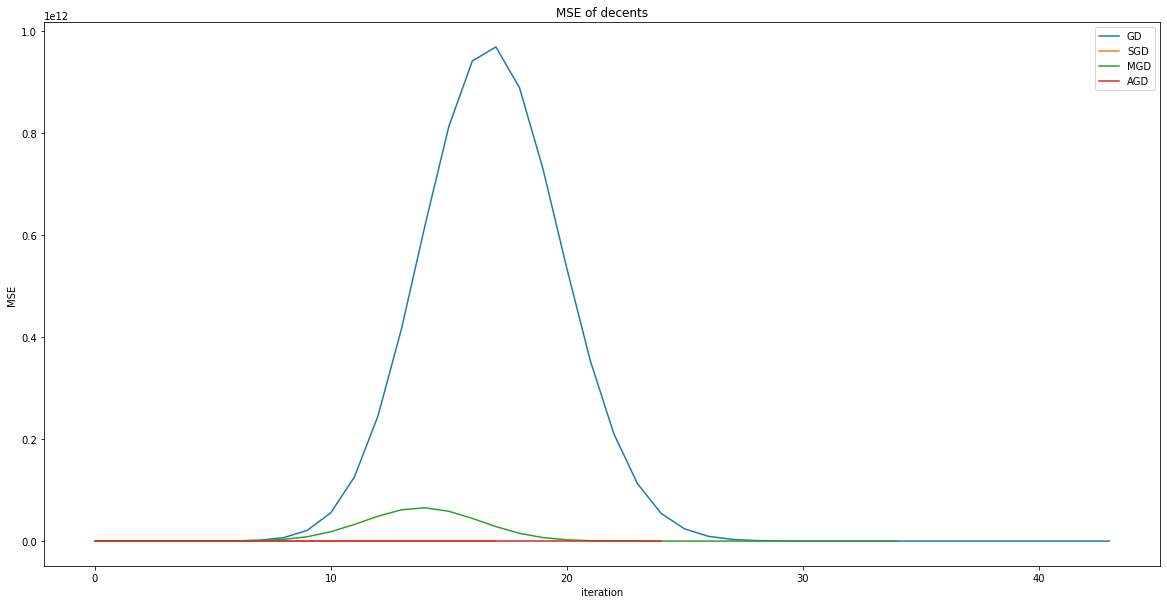

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(np.arange(len(loss_GD)), loss_GD, label='GD')
plt.plot(np.arange(len(loss_SGD)), loss_SGD, label='SGD')
plt.plot(np.arange(len(loss_MGD)), loss_MGD, label='MGD')
plt.plot(np.arange(len(loss_AGD)), loss_AGD, label='AGD')
plt.title('MSE of decents')
plt.ylabel('MSE')
plt.xlabel('iteration')
plt.legend()
plt.show()

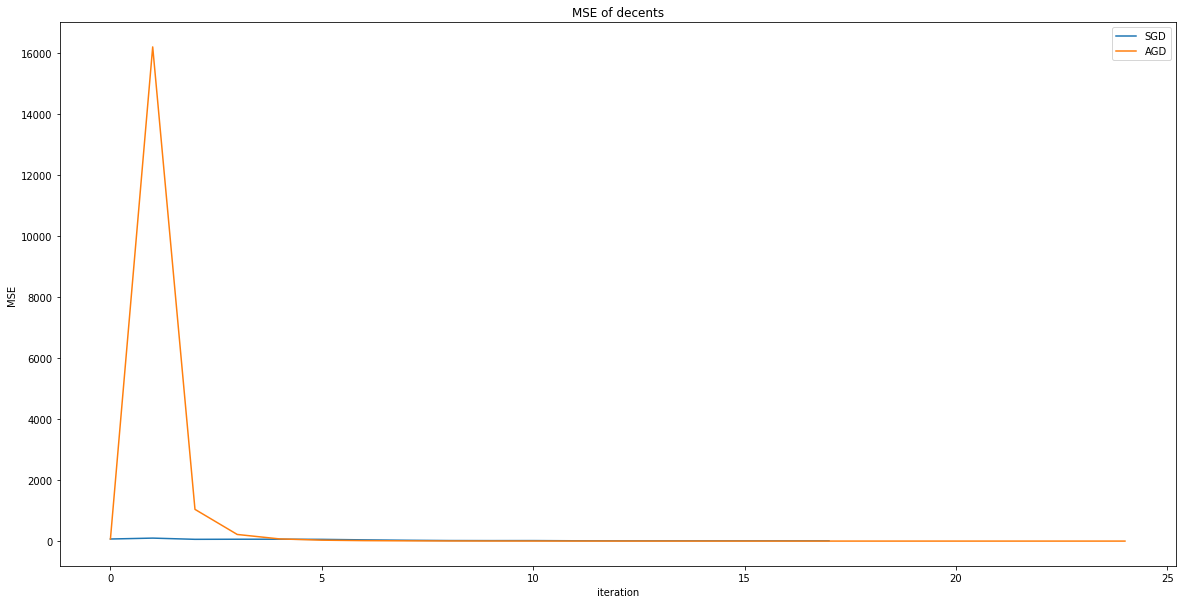

In [71]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(len(loss_SGD)), loss_SGD, label='SGD')
plt.plot(np.arange(len(loss_AGD)), loss_AGD, label='AGD')
plt.title('MSE of decents')
plt.ylabel('MSE')
plt.xlabel('iteration')
plt.legend()
plt.show()

Ну что можно сказать?
Лучше всего, но и дольше всего сходтся обычный спуск и моментум. Моментум оказался побыстрее (оно и ясно, он по инерции едет).
У Adagrad быстрее наступила сходимость, так как первые шаги были большими, веса быстрее перестали меняться.
SGD же просто досходился до какого-то момента. Так как у него изменяется только одна компонента вектора, по сути у SGD условие на сходимость раньше. 
Ну и логично, что и качество у SGD и Adagrad хуже (r2 < 0 и r2 в 2 раза меньше, чем у GD). Ну это наверное просто параметры не подобраны.
Что касается графиков, MSE GD и SGD на 10 итерации почему-то начинают улетать в небеса (SGD меньше, т.к. у него инерция не дает сильно пойти не правильно). Возможно, потому что линии уровня функционала там ведут себя очень вытянуто, а длина шага большая. Ну через какое-то время она уменьшается и оба метода начинают сходиться.
У adagrad такая проблема возникает еще на 1 итерации, но длина шага сразу получает по зубам и после этого все тоже сходится.

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [59]:
import time

batch_sizes = np.arange(5, 500, 10)
k = 5
# YOUR CODE:
time_means = []
iter_means = []
time_vars = []
iter_vars = []
for bs in np.arange(5, 500, 10):
    times = []
    iters = []
    for i in range(k):
        reg = LinearRegression(
            descent = StochasticDescent(lambda_ = lambda_sgd, w0 = w0, batch_size=bs),
            max_iter=100000,
            tolerance=5e-4 # давайте усилим условия сходимости
            )
        start = time.time()
        reg.fit(X_train, y_train)
        times.append(time.time() - start)
        iters.append(len(reg.loss_history))
    time_means.append(np.mean(times))
    time_vars.append(np.var(times))
    iter_means.append(np.mean(iters))
    iter_vars.append(np.var(iters))
    print(bs)

5
15
25
35
45
55
65
75
85
95
105
115
125
135
145
155
165
175
185
195
205
215
225
235
245
255
265
275
285
295
305
315
325
335
345
355
365
375
385
395
405
415
425
435
445
455
465
475
485
495


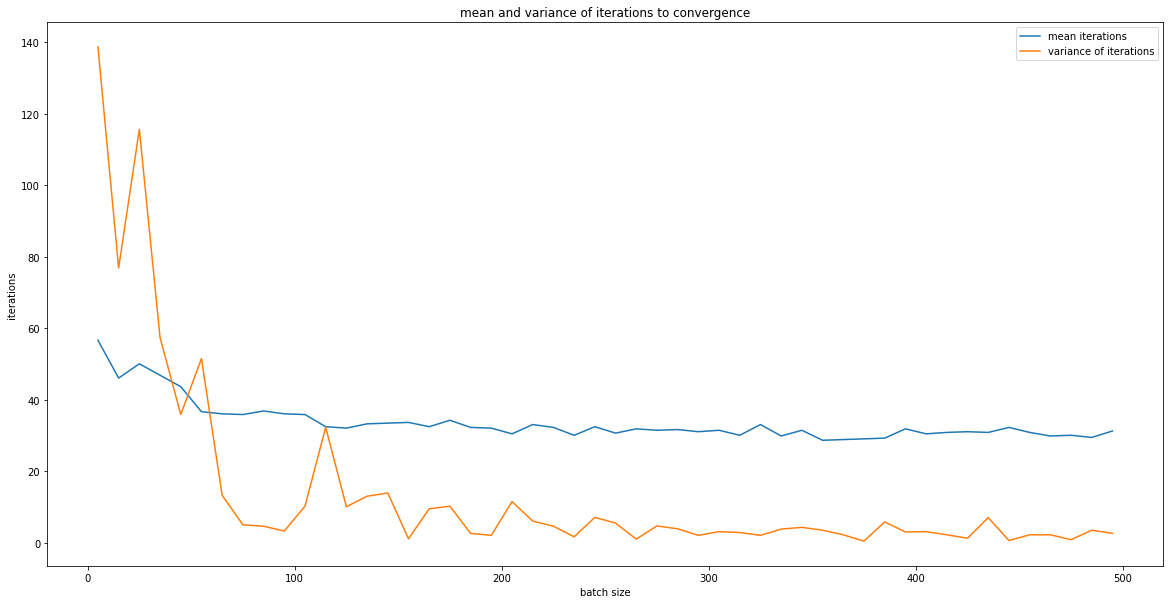

In [60]:
plt.figure(figsize=(20,10))
plt.plot(batch_sizes, iter_means, label='mean iterations')
plt.plot(batch_sizes, iter_vars, label='variance of iterations')
plt.title('mean and variance of iterations to convergence')
plt.ylabel('iterations')
plt.xlabel('batch size')
plt.legend()
plt.show()

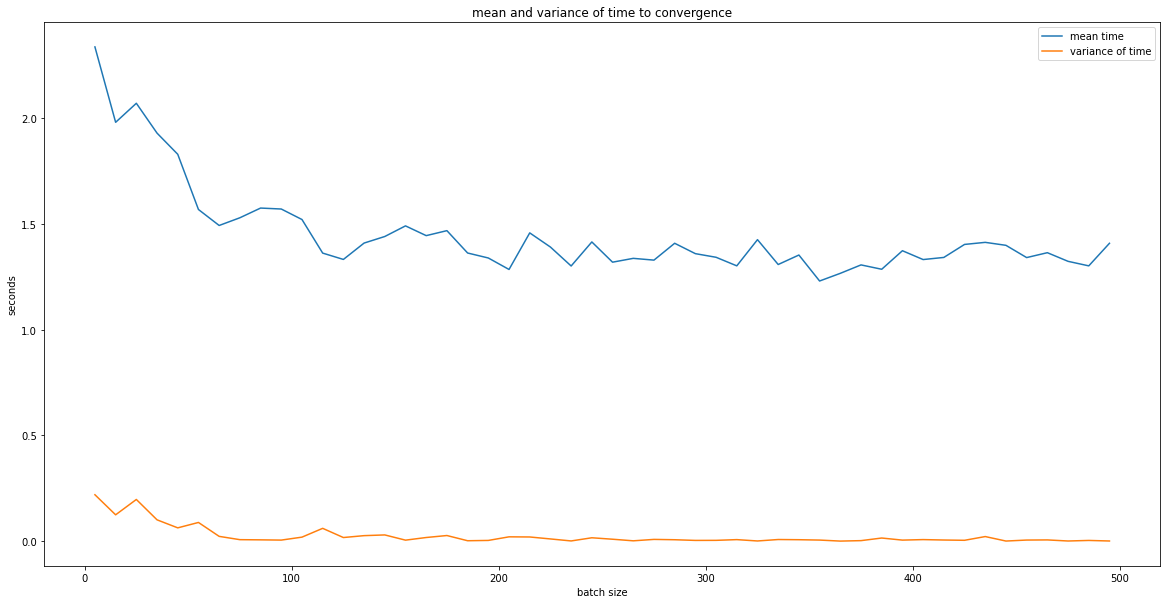

In [61]:
plt.figure(figsize=(20,10))
plt.plot(batch_sizes, time_means, label='mean time')
plt.plot(batch_sizes, time_vars, label='variance of time')
plt.title('mean and variance of time to convergence')
plt.ylabel('seconds')
plt.xlabel('batch size')
plt.legend()
plt.show()

**Выводы**: Ладно, от изменения tolerance результаты не сильно поменялись. В общем, видно, что после bs = 100 время сходимости примерно одинакого. После bs=200 оно особо и не варьируется (дисперсия уменьшается). Количество итераций же после bs=50 падает с 60 до 30 и примерно там и остается дальше. Вывод наверное надо сделать, что оптимальный размер батча это 100, но исходя из этих данных вывод такой: не важно, какой размер бачта, главное больше 100. 

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. (Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов). Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{1}{2} \| w \|^2
$$

Допишите классы **GradientDescentReg**, **StochasticDescentReg**, **MomentumDescentReg**, **AdagradReg** в файле `utils.py`. Мы будем использовать тот же самый класс для линейной регрессии, так как для сравнения методов с регуляризацией и без неё нам нужна только MSE часть функции потерь.

Найдите по валидационной выборке лучшие параметры обучения с регуляризацией. Сравните для каждого метода результаты на тестовой выборке по метрикам MSE и R^2 с регуляризацией и без регуляризации. Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации.

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Чем вы можете объяснить это?

In [73]:
%autoreload 2

from utils import (
    AdagradReg,
    GradientDescentReg,
    MomentumDescentReg,
    StochasticDescentReg,
)


Оставим лямбды, какие нашли, потому что перебирать все параметры очень долго, да и к тому же нам важен только порядок лямбды, 
а из-за регуляризации он вряд ли изменится. Более формально: от того, что мы лямбду и мю пропорционально изменим, ничего не изменится, поэтому достаточно лишь подобрать мю, если мы знаем порядок лямбды, при котором длина шага самая оптимальная. От того, что мы зарегуляризуем веса, оптимальность этой длины не пропадет, так как мы все так же будем шагать по тому же функционалу (чуть измененному, но масштаб у него такой, как и был) 

In [111]:
w0 = np.zeros(X_train.shape[1])
# YOUR CODE:
r2_list_gdReg = []
num = 10
for mu in np.logspace(-5, 1, num=num):
    reg = LinearRegression(
    descent = GradientDescentReg(lambda_ = lambda_gd, w0 = w0, mu=mu),
    #max_iter=100,
    #tolerance=1e-4
    )
    reg.fit(X_train_val, y_train_val)
    r2 = r2_score(y_test_val, reg.predict(X_test_val))
    r2_list_gdReg.append(r2)
    print('for mu ', end=' ')
    print(mu)
    print('r2 is! ', end=' ')
    print(r2)
    print()

for mu  1e-05
r2 is!  0.639034314257364

for mu  4.641588833612782e-05
r2 is!  0.6389728269336924

for mu  0.00021544346900318823
r2 is!  0.6386854198553884

for mu  0.001
r2 is!  0.6373086323409947

for mu  0.004641588833612777
r2 is!  0.6300448393299068

for mu  0.021544346900318822
r2 is!  0.5831953719986145

for mu  0.1
r2 is!  0.24992516769464934

for mu  0.46415888336127725
r2 is!  -1.1815522550057977

for mu  2.154434690031882
r2 is!  -8.137409235392955

for mu  10.0
r2 is!  -27.472153353881186



In [84]:
mu_gd = np.logspace(-5, 1, num=num)[np.argmax(np.array(r2_list_gdReg))]
mu_gd # 1e-5

1e-05

In [85]:
r2_list_sgdReg = []
num = 10
for mu in np.logspace(-3, 1, num=num):
    reg = LinearRegression(
    descent = StochasticDescentReg(lambda_ = lambda_sgd, w0 = w0, mu=mu),
    #max_iter=100,
    #tolerance=1e-4
    )
    reg.fit(X_train_val, y_train_val)
    r2 = r2_score(y_test_val, reg.predict(X_test_val))
    r2_list_sgdReg.append(r2)
    print('for mu ', end=' ')
    print(mu)
    print('r2 is! ', end=' ')
    print(r2)
    print()

for mu  0.001
r2 is!  -10.304316219086523

for mu  0.0027825594022071257
r2 is!  -2.907314996232078

for mu  0.007742636826811269
r2 is!  -8.422832184255935

for mu  0.021544346900318832
r2 is!  -13.447356751295079

for mu  0.05994842503189409
r2 is!  -24.376078575679774

for mu  0.1668100537200059
r2 is!  -4.62571942636681

for mu  0.46415888336127775
r2 is!  -2.1135722262483267

for mu  1.2915496650148828
r2 is!  -4.1481910906407515

for mu  3.593813663804626
r2 is!  -14.289109778762226

for mu  10.0
r2 is!  -28.502984071464006



In [87]:
mu_sgd = np.logspace(-3, 1, num=num)[np.argmax(np.array(r2_list_sgdReg))]
mu_sgd # 0.46

0.46415888336127775

In [88]:
# Оставим лямбды, какие нашли, потому что передирать все параметры очень долго, да и к тому же нам важен только порядок лямбды, 
# а из-за регуляризации он вряд ли изменится
w0 = np.zeros(X_train.shape[1])
# YOUR CODE:
r2_list_mgdReg = []
num = 10
for mu in np.logspace(-5, 1, num=num):
    reg = LinearRegression(
    descent = MomentumDescentReg(lambda_ = lambda_mgd, w0 = w0, mu=mu),
    #max_iter=100,
    #tolerance=1e-4
    )
    reg.fit(X_train_val, y_train_val)
    r2 = r2_score(y_test_val, reg.predict(X_test_val))
    r2_list_mgdReg.append(r2)
    print('for mu ', end=' ')
    print(mu)
    print('r2 is! ', end=' ')
    print(r2)
    print()

for mu  1e-05
r2 is!  0.6375592193166565

for mu  4.641588833612782e-05
r2 is!  0.637499301057223

for mu  0.00021544346900318823
r2 is!  0.6372191885016844

for mu  0.001
r2 is!  0.6358764940035808

for mu  0.004641588833612777
r2 is!  0.6287754652883555

for mu  0.021544346900318822
r2 is!  0.5811233650801009

for mu  0.1
r2 is!  0.25353327491699185

for mu  0.46415888336127725
r2 is!  -1.191854941410428

for mu  2.154434690031882
r2 is!  -8.137765521032728

for mu  10.0
r2 is!  -27.34958644108195



In [89]:
mu_mgd = np.logspace(-5, 1, num=num)[np.argmax(np.array(r2_list_mgdReg))]
mu_mgd # 1e-5

1e-05

In [91]:
# Оставим лямбды, какие нашли, потому что перебирать все параметры очень долго, да и к тому же нам важен только порядок лямбды, 
# а из-за регуляризации он вряд ли изменится
w0 = np.zeros(X_train.shape[1])
# YOUR CODE:
r2_list_agdReg = []
num = 10
for mu in np.logspace(-4, 2, num=num):
    reg = LinearRegression(
    descent = AdagradReg(lambda_ = lambda_agd, w0 = w0, mu=mu),
    #max_iter=100,
    #tolerance=1e-4
    )
    reg.fit(X_train_val, y_train_val)
    r2 = r2_score(y_test_val, reg.predict(X_test_val))
    r2_list_agdReg.append(r2)
    print('for mu ', end=' ')
    print(mu)
    print('r2 is! ', end=' ')
    print(r2)
    print()

for mu  0.0001
r2 is!  0.3327345247693342

for mu  0.00046415888336127773
r2 is!  0.33283324294003325

for mu  0.002154434690031882
r2 is!  0.33325762424216554

for mu  0.01
r2 is!  0.3345096845636122

for mu  0.046415888336127774
r2 is!  0.31774481958756995

for mu  0.21544346900318823
r2 is!  0.05560263490183581

for mu  1.0
r2 is!  -2.9074955782883327

for mu  4.641588833612772
r2 is!  -16.233598998235397

for mu  21.54434690031882
r2 is!  -35.71525888728117

for mu  100.0
r2 is!  -44.93788985443524



In [92]:
mu_agd = np.logspace(-4, 2, num=num)[np.argmax(np.array(r2_list_agdReg))]
mu_agd # 0.01

0.01

In [93]:
reg_GD_Reg = LinearRegression(
    descent = GradientDescentReg(lambda_ = lambda_gd, w0 = w0, mu = mu_gd),
    max_iter=10000
    )
reg_GD_Reg.fit(X_train, y_train)
print(r2_score(y_test, reg_GD_Reg.predict(X_test)))
print(mse(y_test, reg_GD_Reg.predict(X_test)))
print(len(reg_GD_Reg.loss_history))

0.6415110562232798
0.4990448036037636
44


In [95]:
reg_SGD_Reg = LinearRegression(
    descent = StochasticDescentReg(lambda_ = lambda_sgd, w0 = w0, mu = mu_sgd),
    max_iter=10000
    )
reg_SGD_Reg.fit(X_train, y_train)
print(r2_score(y_test, reg_SGD_Reg.predict(X_test)))
print(mse(y_test, reg_SGD_Reg.predict(X_test)))
print(len(reg_SGD_Reg.loss_history))

-1.3611580280080853
3.2869176715771933
83


In [96]:
reg_MGD_Reg = LinearRegression(
    descent = MomentumDescentReg(lambda_ = lambda_mgd, w0 = w0, mu = mu_mgd),
    max_iter=10000
    )
reg_MGD_Reg.fit(X_train, y_train)
print(r2_score(y_test, reg_MGD_Reg.predict(X_test)))
print(mse(y_test, reg_MGD_Reg.predict(X_test)))
print(len(reg_MGD_Reg.loss_history))

0.6400398768245669
0.5010928010297424
35


In [97]:
reg_AGD_Reg = LinearRegression(
    descent = AdagradReg(lambda_ = lambda_agd, w0 = w0, mu = mu_agd),
    max_iter=10000
    )
reg_AGD_Reg.fit(X_train, y_train)
print(r2_score(y_test, reg_AGD_Reg.predict(X_test)))
print(mse(y_test, reg_AGD_Reg.predict(X_test)))
print(len(reg_AGD_Reg.loss_history))

0.34040155897412905
0.9182129049539749
25


In [99]:
# R2 было vs стало
print(r2_score(y_test, reg_GD.predict(X_test)), end = ' vs ') 
print(r2_score(y_test, reg_GD_Reg.predict(X_test)))
print(r2_score(y_test, reg_SGD.predict(X_test)), end = ' vs ') 
print(r2_score(y_test, reg_SGD_Reg.predict(X_test)))
print(r2_score(y_test, reg_MGD.predict(X_test)), end = ' vs ') 
print(r2_score(y_test, reg_MGD_Reg.predict(X_test)))
print(r2_score(y_test, reg_AGD.predict(X_test)), end = ' vs ') 
print(r2_score(y_test, reg_AGD_Reg.predict(X_test)))

0.641528174318718 vs 0.6415110562232798
-5.565635030883087 vs -1.3611580280080853
0.6400565806155496 vs 0.6400398768245669
0.3389555918259909 vs 0.34040155897412905


In [100]:
# MSE было vs стало
print(mse(y_test, reg_GD.predict(X_test)), end = ' vs ') 
print(mse(y_test, reg_GD_Reg.predict(X_test)))
print(mse(y_test, reg_SGD.predict(X_test)), end = ' vs ') 
print(mse(y_test, reg_SGD_Reg.predict(X_test)))
print(mse(y_test, reg_MGD.predict(X_test)), end = ' vs ') 
print(mse(y_test, reg_MGD_Reg.predict(X_test)))
print(mse(y_test, reg_AGD.predict(X_test)), end = ' vs ') 
print(mse(y_test, reg_AGD_Reg.predict(X_test)))

0.49902097386863686 vs 0.4990448036037636
9.139880326579307 vs 3.2869176715771933
0.5010695480390014 vs 0.5010928010297424
0.9202258049443007 vs 0.9182129049539749


In [101]:
loss_MGD_Reg = np.array(reg_MGD_Reg.loss_history)
loss_GD_Reg = np.array(reg_GD_Reg.loss_history)
loss_SGD_Reg = np.array(reg_SGD_Reg.loss_history)
loss_AGD_Reg = np.array(reg_AGD_Reg.loss_history)

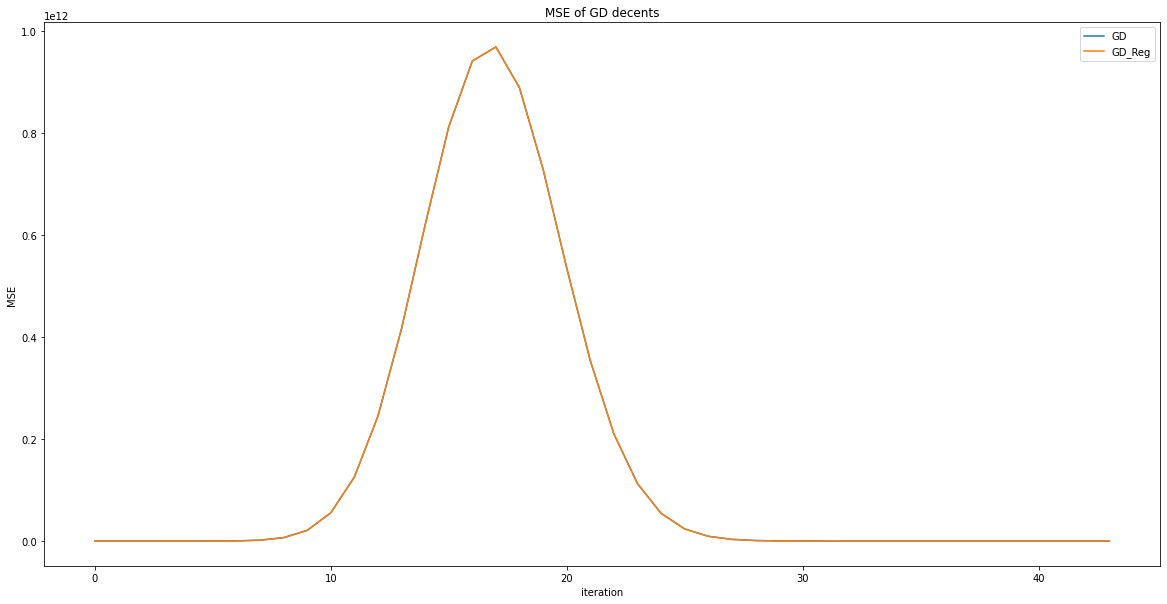

In [104]:
# второго не видно, потому что они почти совпадают
plt.figure(figsize=(20,10))
plt.plot(np.arange(len(loss_GD)), loss_GD, label='GD')
plt.plot(np.arange(len(loss_GD_Reg)), loss_GD_Reg, label='GD_Reg')
plt.title('MSE of GD decents')
plt.ylabel('MSE')
plt.xlabel('iteration')
plt.legend()
plt.show()

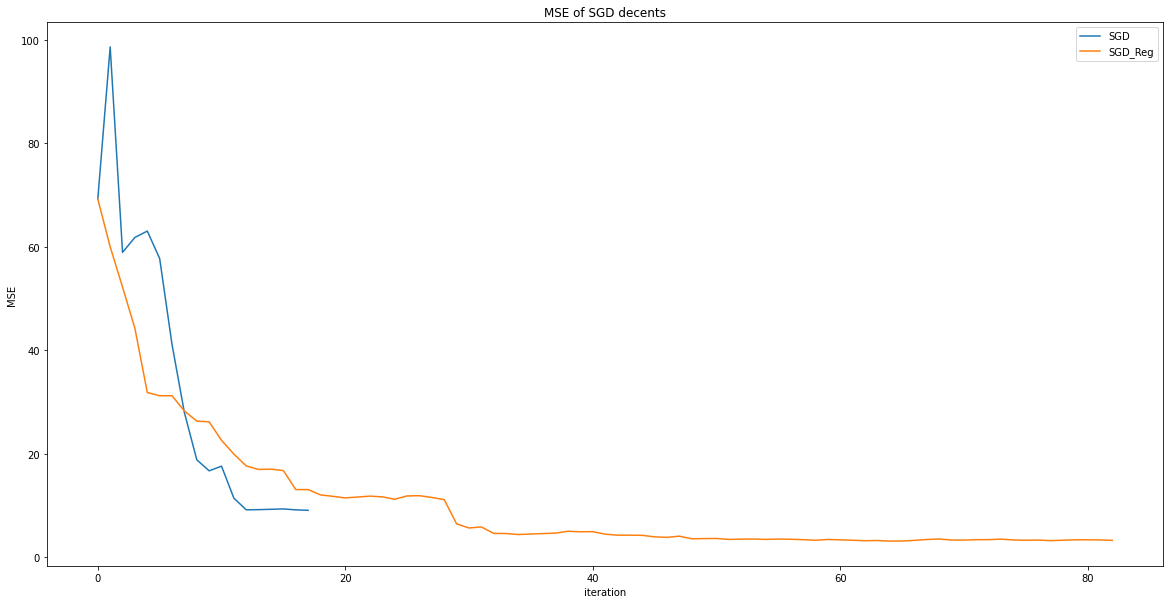

In [105]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(len(loss_SGD)), loss_SGD, label='SGD')
plt.plot(np.arange(len(loss_SGD_Reg)), loss_SGD_Reg, label='SGD_Reg')
plt.title('MSE of SGD decents')
plt.ylabel('MSE')
plt.xlabel('iteration')
plt.legend()
plt.show()

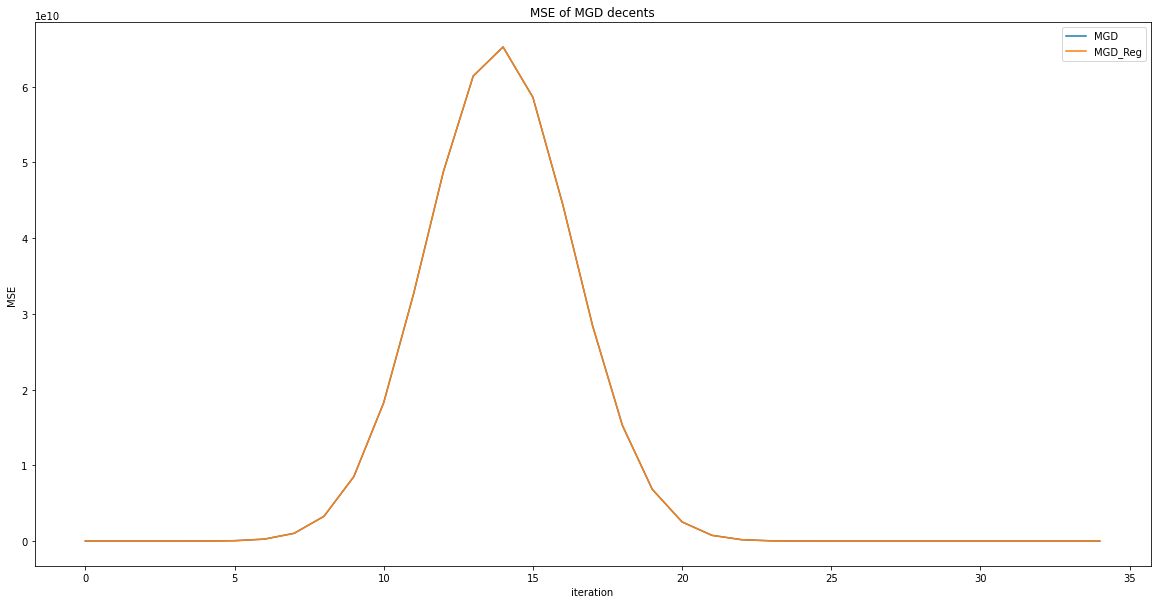

In [106]:
# второго не видно, потому что они почти совпадают
plt.figure(figsize=(20,10))
plt.plot(np.arange(len(loss_MGD)), loss_MGD, label='MGD')
plt.plot(np.arange(len(loss_MGD_Reg)), loss_MGD_Reg, label='MGD_Reg')
plt.title('MSE of MGD decents')
plt.ylabel('MSE')
plt.xlabel('iteration')
plt.legend()
plt.show()

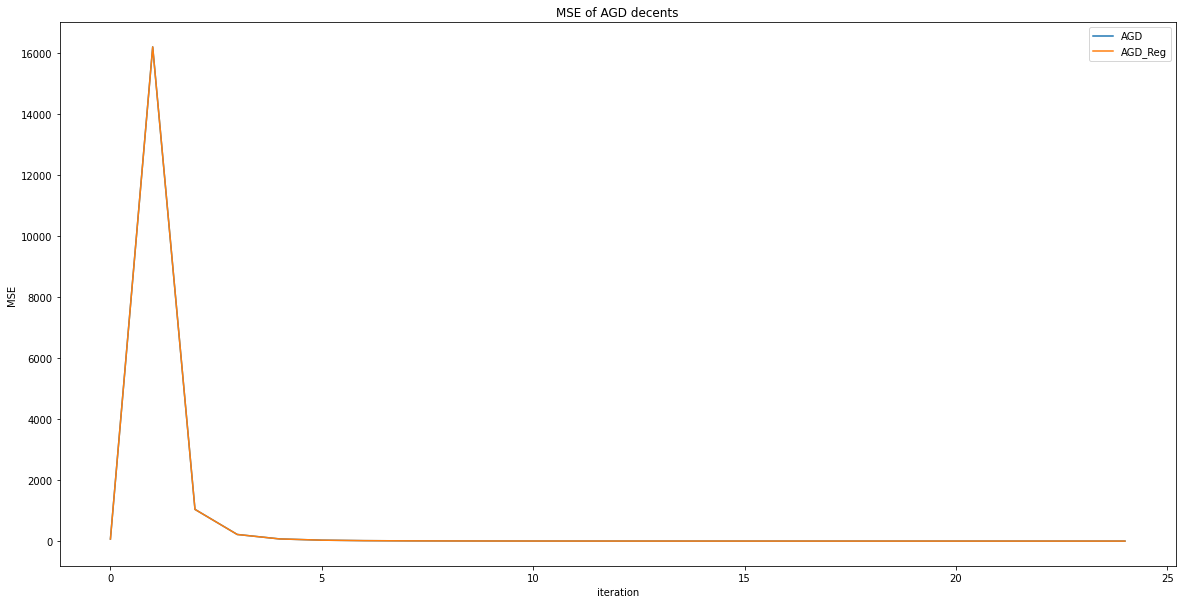

In [107]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(len(loss_AGD)), loss_AGD, label='AGD')
plt.plot(np.arange(len(loss_AGD_Reg)), loss_AGD_Reg, label='AGD_Reg')
plt.title('MSE of AGD decents')
plt.ylabel('MSE')
plt.xlabel('iteration')
plt.legend()
plt.show()

Видно, что во всех случаях, кроме SGD, ничего почти не менялось. Это связано с тем, что мю получалось очень маленьким. Почему так происходило? Наверное, потому что модель и не думала делать большими веса, т.е. не было признака, который бы она считала очень важным.
Что касается SGD, то тут просто считается градиент по одному объекту, поэтому на нем модель переобучается (ну 1 объект, 300 признаков) и регуляризация влияет.

## Задание 8. Бонус — Реализация метода SAG (2 балла)

В качестве бонуса вам будет следующее задание - напишите собственную реализацию стохастического градиентного спуска по методу SAG в файле `utils.py`. Подробнее прочитать про SAG можно [здесь](https://arxiv.org/pdf/1309.2388.pdf).

Сравните свою реализацию метода SAG с обычным полным градиентным спуском на наших данных. Проведите сравнение аналогично заданию 5. Что вы можете сказать про сходимость этого метода?

In [191]:
%autoreload 2

from utils import (
    StochasticAverageGradient,
)

In [189]:
num = 10
#for la in np.logspace(1, 5, num=num):
reg_SAG = LinearRegression(
    descent = StochasticAverageGradient(x_shape=X.shape[0], lambda_ = 100, w0 = w0, p=0.8),
    tolerance=1e-7,
    max_iter=3000
    )
reg_SAG.fit(X_train, y_train)
print(r2_score(y_test, reg_SAG.predict(X_test))) # R2
print(mse(y_test, reg_SAG.predict(X_test))) # MSE 
print(len(reg_SAG.loss_history)) # кол-во итераций

-2.7823586172505035
5.287820157565338
3000



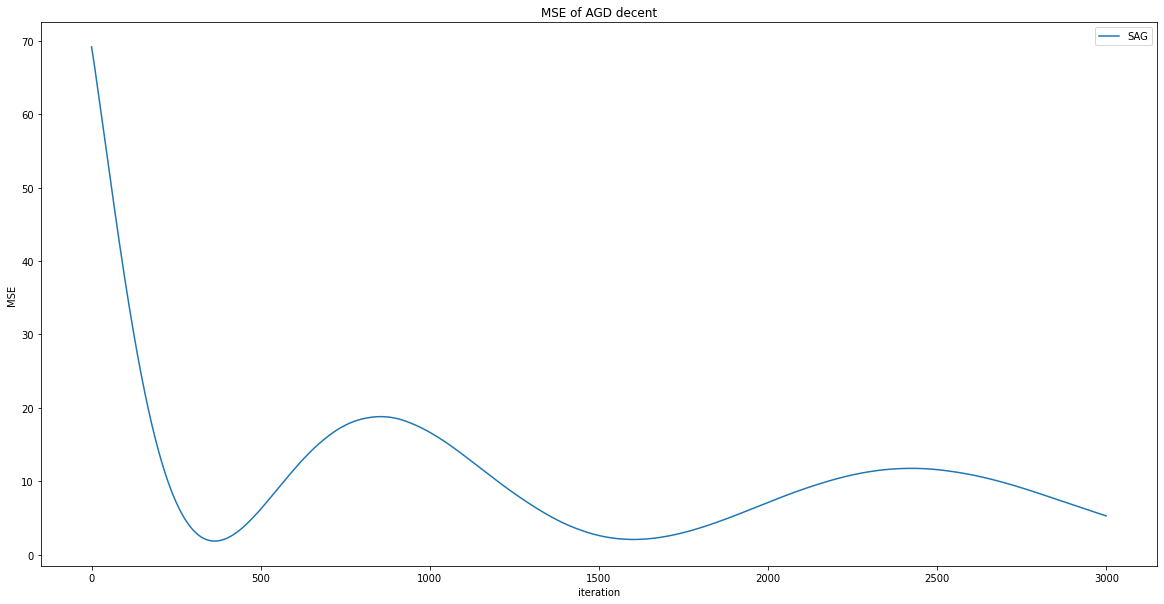

In [194]:
f = plt.figure(figsize=(20,10))
plt.plot(np.arange(len(reg_SAG.loss_history)), reg_SAG.loss_history, label='SAG')
plt.title('MSE of AGD decent')
plt.ylabel('MSE')
plt.xlabel('iteration')
plt.legend()
plt.show()

Ща все объясню. 
Во-первых, я поставил очень маленькое значение tolerance, потому что на первых шагах градиент обновляется очень медленно (покомпонентно), соответственно изменение весов очень маленькое. Если этого не сделать, далеко не уйдем.
Во-вторых, MSE(iter) - затухающая синусоида. Это и понятно. Мы спускаемся по параболоиду, и у нас очень большая инерция, так как градиент на всех объектах, кроме одного, такой же, как был. Поэтому мы катаемся, как шарик по в ямке туда-сюда. Но с затуханием, так как длина шага все таки уменьшается. Кстати, это дело регулируется p, поэтому я его увеличил. При p=0.5 затуханий почти нет (скрин ниже).  
В-третьих, видно, что метод отсойный для данной задачи. r2 < 0 и это при +- подобранных параметрах. (если увеличить лямбду в 2 раза, уже не будет сходиться). Ну оно и ясно: Мы или будем туда-сюда промахиваться и иметь большую ошибку, или (если затухать), по другим осям просто не доедем до вершины параболоида. Можно, наверное, найти параметры, при которых модель все таки доходит до вершины, а дальше затухнуть. Но это долго искать + не факт.
В итоге: GD объективно тут лучше) Сходимость SAG очень спорная.
Единственное, что его оправдывает: итоговая MSE сопоставима с MSE GD_Reg. 

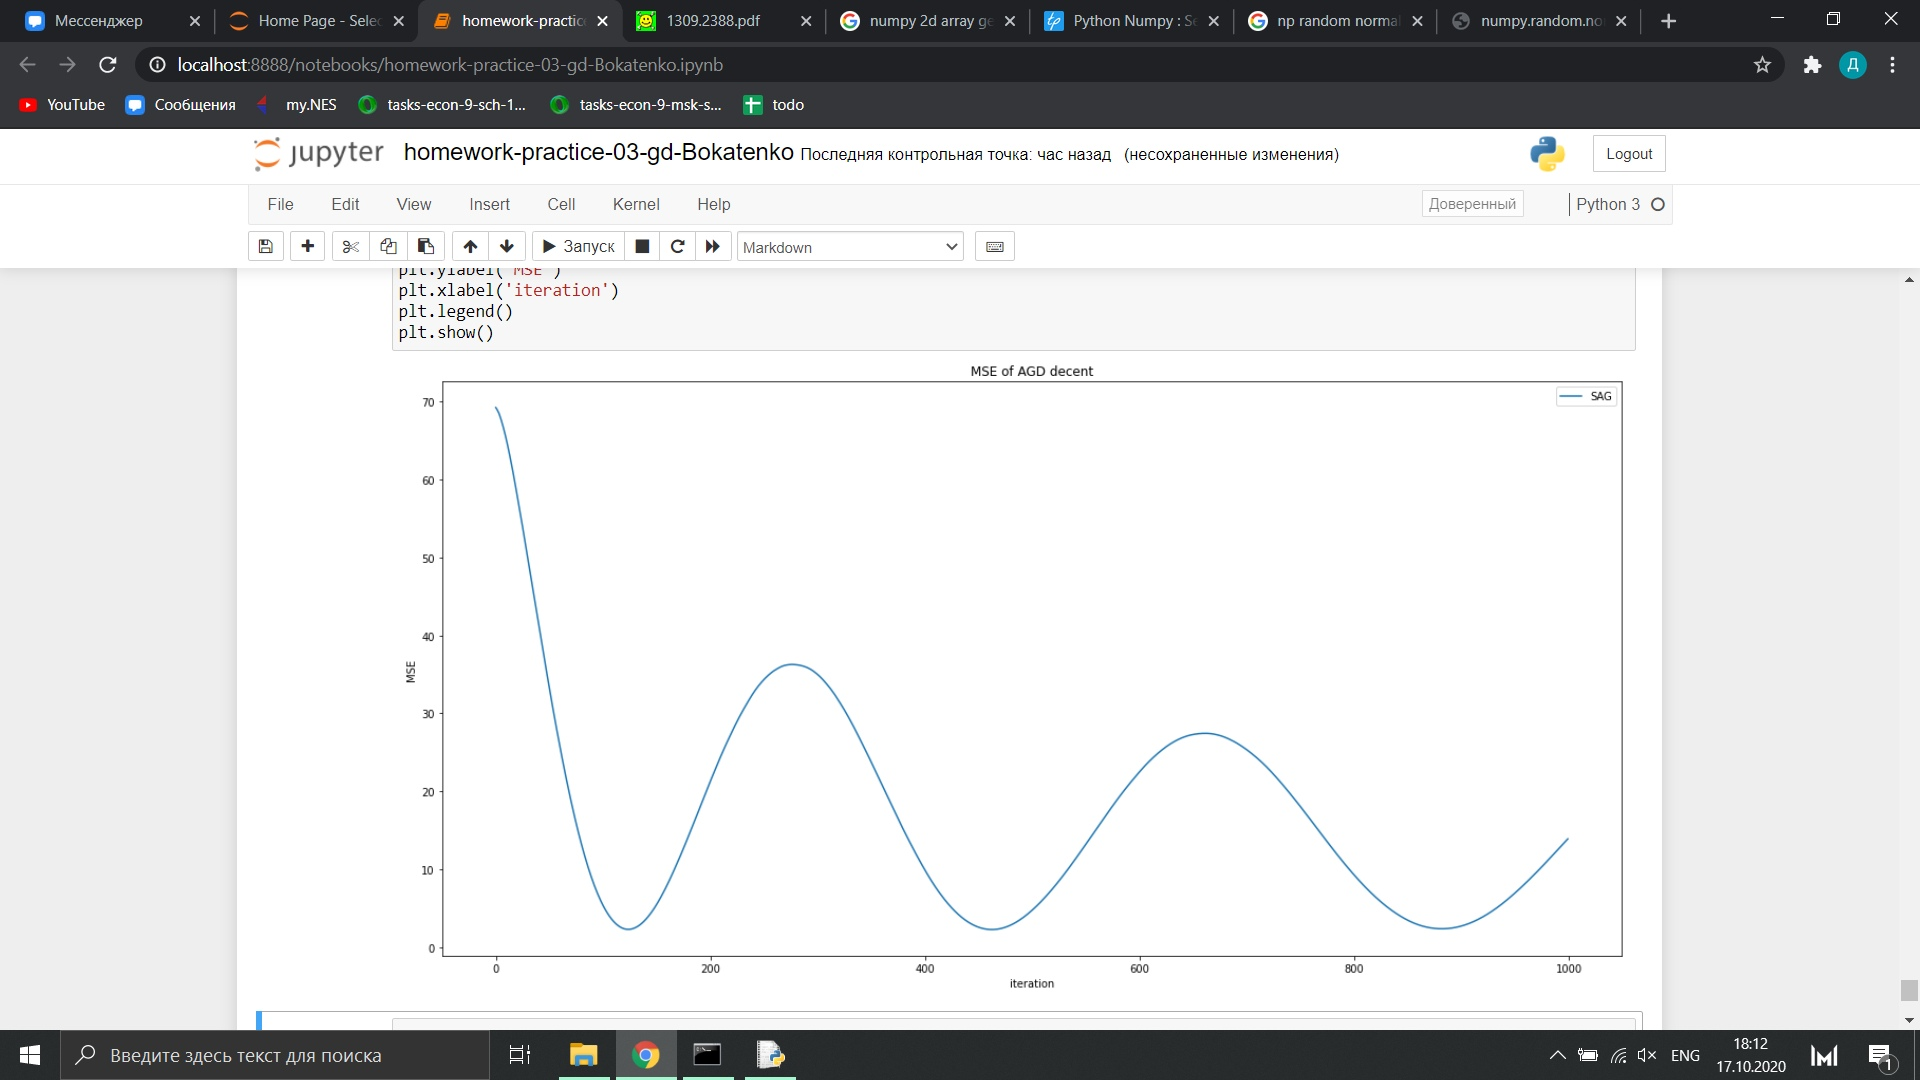